# **Отчёт о выполнении домашнего задания к лекции «Задачи классификации и кластеризации»**

![котики...](https://drive.google.com/uc?export=view&id=1l7QRakaLHyBmoGdUKOcPu9JPFDIqmP2e)

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from pylab import rcParams
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

%load_ext lab_black
rcParams["figure.figsize"] = 11, 7

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


<div class="alert alert-block alert-info">

## **Задание**   
    
### 1. Возьмите датасет с цветками iris’а.
### 2. Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety.
### 3. Разделите данные на выборку для обучения и тестирования.
### 4. Постройте модель LDA.
### 5. Визуализируйте предсказания для тестовой выборки и центры классов.
### 6. Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width.
### 7. Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию.

***

### 1. Загрузим датасет с цветками iris’а.

In [ ]:
# загрузка данных
df_iris = pd.read_csv("/home/sk27/learning/STPY-37/iris.csv")

In [ ]:
df_iris

,sepal_length,sepal_width,petal_length,petal_width,variety,variety_num
0,5.1,3.5,1.4,0.2,Setosa,0
1,4.9,3.0,1.4,0.2,Setosa,0
2,4.7,3.2,1.3,0.2,Setosa,0
3,4.6,3.1,1.5,0.2,Setosa,0
4,5.0,3.6,1.4,0.2,Setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica,2
146,6.3,2.5,5.0,1.9,Virginica,2
147,6.5,3.0,5.2,2.0,Virginica,2
148,6.2,3.4,5.4,2.3,Virginica,2


In [ ]:
# формат и состав данных
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   variety       150 non-null    object 
 5   variety_num   150 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### 2. Оставим два признака - sepal_length и sepal_width и целевую переменную - variety.

In [ ]:
# если поступить как в задании, столбец, аналогичный variety_num, придётся добавлять вручную
df_iris_small = df_iris[["sepal_length", "sepal_width", "variety", "variety_num"]]

In [ ]:
df_iris_small

,sepal_length,sepal_width,variety,variety_num
0,5.1,3.5,Setosa,0
1,4.9,3.0,Setosa,0
2,4.7,3.2,Setosa,0
3,4.6,3.1,Setosa,0
4,5.0,3.6,Setosa,0
...,...,...,...,...
145,6.7,3.0,Virginica,2
146,6.3,2.5,Virginica,2
147,6.5,3.0,Virginica,2
148,6.2,3.4,Virginica,2


### 3. Разделим данные на выборку для обучения и тестирования.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df_iris_small[["sepal_length", "sepal_width"]],
    df_iris_small["variety_num"],
    test_size=0.2,
    random_state=27,
)

### 4. Построем модель LDA.

In [ ]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [ ]:
# проверим качество предсказания. Оно достаточное
accuracy_score(y_test, lda.predict(X_test))

0.8

### 5. Визуализируем предсказания для тестовой выборки и центры классов.

In [ ]:
# сформируем набор данных с прогнозом разновидности ириса
df_result = X_test.copy()
df_result["variety_predict"] = lda.predict(X_test)

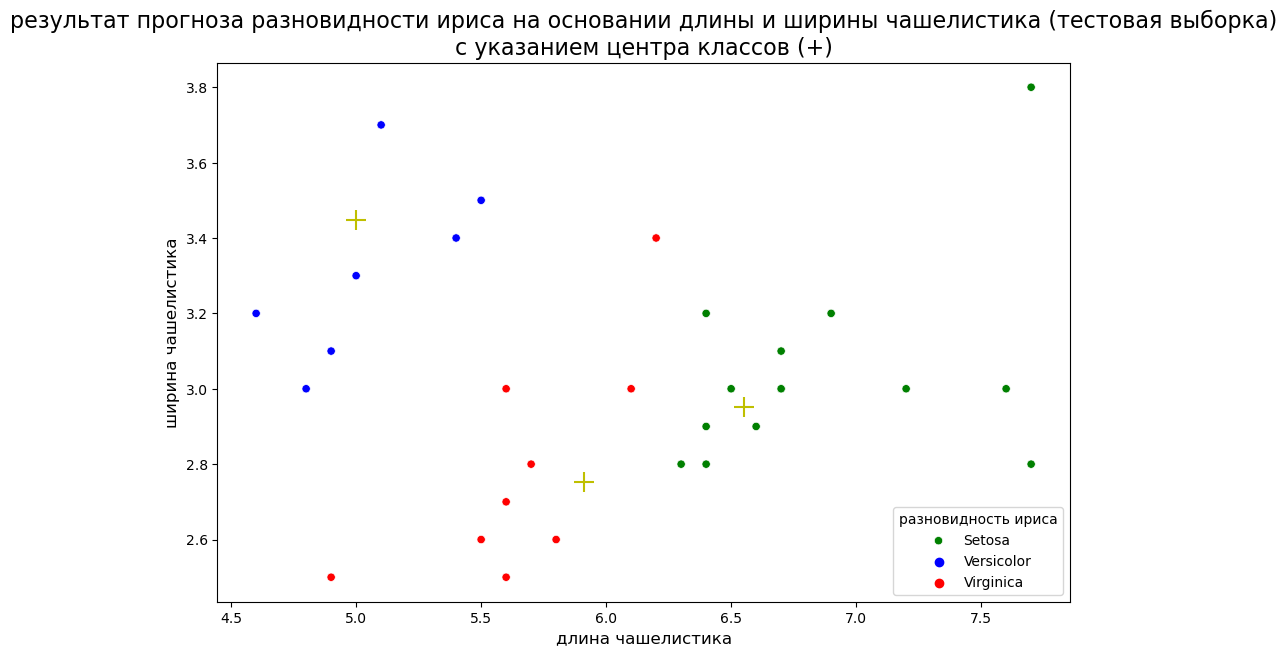

In [ ]:
# построим красивую визуализацию
fig, ax = plt.subplots()
color_dict = dict({0: "blue", 1: "red", 2: "green"})
sns.scatterplot(
    ax=ax,
    data=df_result,
    x="sepal_length",
    y="sepal_width",
    hue="variety_predict",
    palette=color_dict,
    legend="full",
)
plt.legend(
    title="разновидность ириса",
    labels=["Setosa", "Versicolor", "Virginica"],
)
ax.set_xlabel(
    "длина чашелистика",
    size=12,
)
ax.set_ylabel("ширина чашелистика", size=12)
ax.set_title(
    "результат прогноза разновидности ириса на основании длины и ширины чашелистика (тестовая выборка)\nс указанием центра классов (+)",
    size=16,
)
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c="y", s=200, marker="+")
plt.show()

### 6. Отбросим целевую переменную и оставим только два признака - sepal_length и sepal_width.

In [ ]:
df_iris_kmeans = df_iris_small[["sepal_length", "sepal_width"]]

In [ ]:
df_iris_kmeans

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


### 7. Подберём оптимальное число кластеров для алгоритма kmeans и визуализируем полученную кластеризацию.

In [ ]:
# сформируем данные для обучения модели
X = df_iris_kmeans[["sepal_length", "sepal_width"]]
# нормализуем данные
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
df_viz = pd.DataFrame(X_scaled, columns=["sepal_length", "sepal_width"])
df_viz

,sepal_length,sepal_width
0,-0.900681,1.019004
1,-1.143017,-0.131979
2,-1.385353,0.328414
3,-1.506521,0.098217
4,-1.021849,1.249201
...,...,...
145,1.038005,-0.131979
146,0.553333,-1.282963
147,0.795669,-0.131979
148,0.432165,0.788808


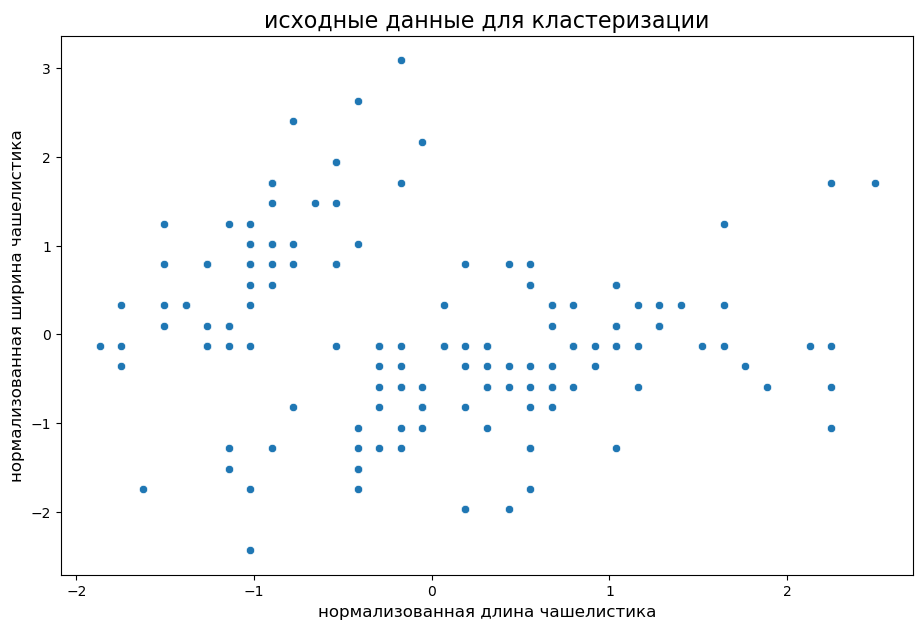

In [ ]:
fig, ax = plt.subplots()
sns.scatterplot(
    ax=ax,
    data=df_viz,
    x="sepal_length",
    y="sepal_width",
)
ax.set_xlabel(
    "нормализованная длина чашелистика",
    size=12,
)
ax.set_ylabel("нормализованная ширина чашелистика", size=12)
ax.set_title(
    "исходные данные для кластеризации",
    size=16,
)
plt.show()

In [ ]:
# явно указываем количество кластеров (впрочем, судя по предыдущей визуализации, их два)
kmeans = KMeans(n_clusters=3)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(X_scaled)

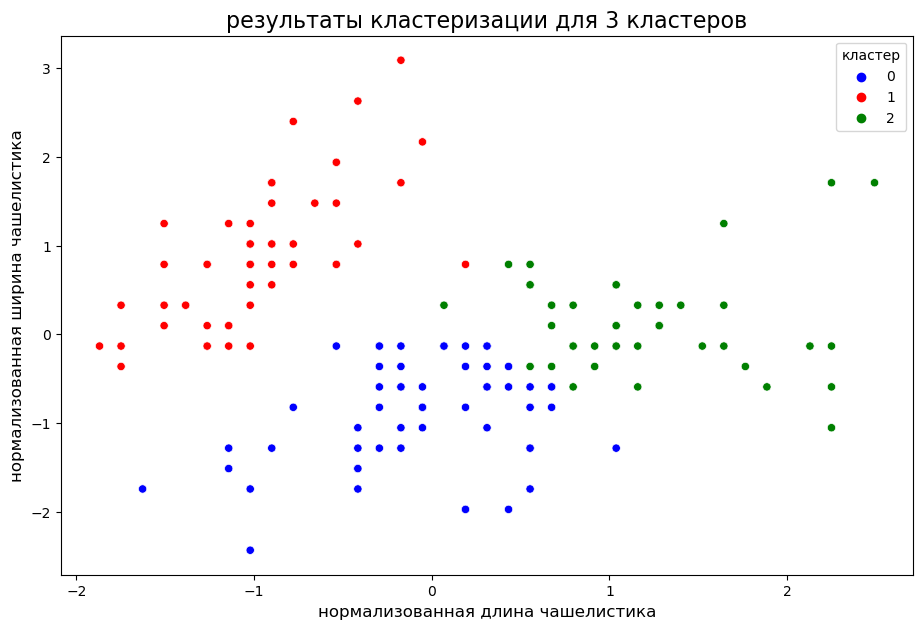

In [ ]:
fig, ax = plt.subplots()
color_dict = dict({0: "blue", 1: "red", 2: "green"})
sns.scatterplot(
    ax=ax,
    data=df_viz,
    x="sepal_length",
    y="sepal_width",
    hue=clusters,
    palette=color_dict,
    legend="full",
)
plt.legend(
    title="кластер",
)
ax.set_xlabel(
    "нормализованная длина чашелистика",
    size=12,
)
ax.set_ylabel("нормализованная ширина чашелистика", size=12)
ax.set_title(
    "результаты кластеризации для 3 кластеров",
    size=16,
)
plt.show()

In [ ]:
# строим график локтя

# создаем словрь для инерции
k_inertia = {}
# задаем диапазон кластеров
ks = range(1, 15)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clf_kmeans.fit(X_scaled)
    # добавляем инерцию каждой модели в словрь
    k_inertia[k] = clf_kmeans.inertia_
df_elbow = pd.DataFrame.from_dict(k_inertia, orient="index").rename(
    columns={0: "inertia"}
)
df_elbow

,inertia
1,300.000000
2,166.951709
3,102.616869
4,79.803022
5,61.809249
...,...
10,27.372873
11,23.586797
12,20.843852
13,18.139263


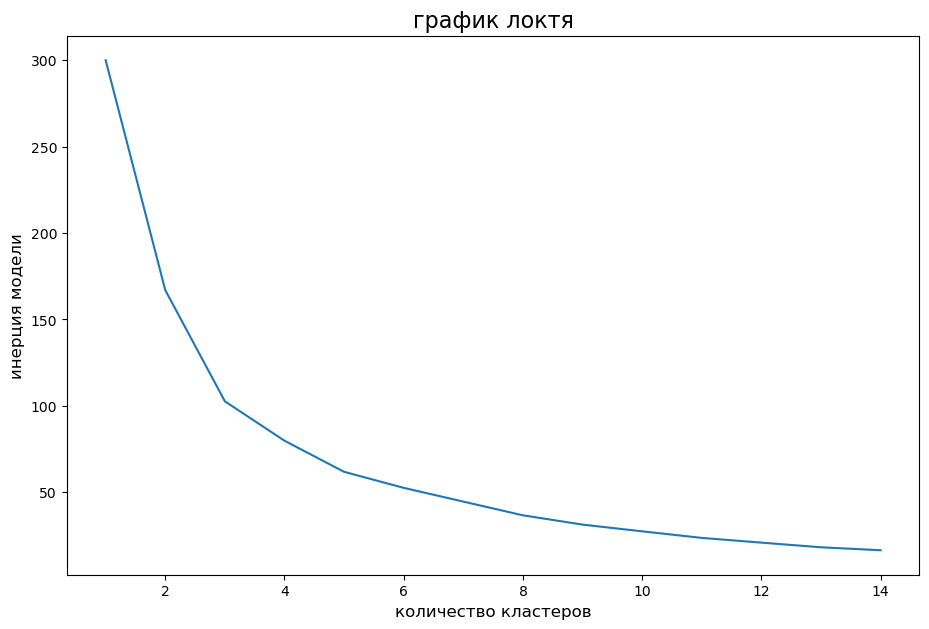

In [ ]:
fig, ax = plt.subplots()
color_dict = dict({0: "blue", 1: "red", 2: "green"})
sns.lineplot(
    ax=ax,
    data=df_elbow,
    x=df_elbow.index,
    y="inertia",
)
ax.set_xlabel(
    "количество кластеров",
    size=12,
)
ax.set_ylabel("инерция модели", size=12)
ax.set_title(
    "график локтя",
    size=16,
)
plt.show()

In [ ]:
# выраженного "локтя" не наблюдается, но и для двух кластеров, как казалось первоначально, инерция модели ещё очень велика. Проверим результаты работы модели для 4 кластеров
kmeans = KMeans(n_clusters=4)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(X_scaled)

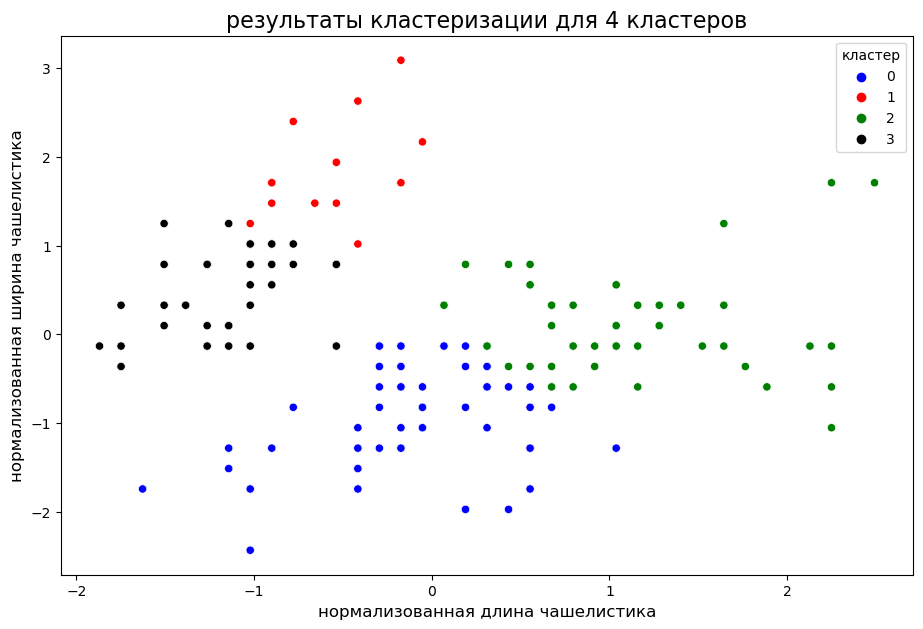

In [ ]:
fig, ax = plt.subplots()
color_dict = dict({0: "blue", 1: "red", 2: "green", 3: "black"})
sns.scatterplot(
    ax=ax,
    data=df_viz,
    x="sepal_length",
    y="sepal_width",
    hue=clusters,
    palette=color_dict,
    legend="full",
)
plt.legend(
    title="кластер",
)
ax.set_xlabel(
    "нормализованная длина чашелистика",
    size=12,
)
ax.set_ylabel("нормализованная ширина чашелистика", size=12)
ax.set_title(
    "результаты кластеризации для 4 кластеров",
    size=16,
)
plt.show()

### Логики в увиденном мало. Останавливаемся на числе кластеров, равном 3.